In [9]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [10]:
##### LOAD IN FROM HERE TO SAVE TIME (FILES CREATED IN EDA notebook)

df = pd.read_csv('flights1500.csv')

weather_df = pd.read_csv('weatherframeTrunc.csv')
weather_dfALT = pd.read_csv('weatherframeTruncALT.csv')

test = pd.read_csv('flights_test.csv')

In [11]:
X = weather_df[['mkt_carrier','distance','origin','dest','crs_dep_time','dep_weather']]
y = weather_df['arr_delay']

X = X.astype({'mkt_carrier': 'category', 'origin': 'category', 'dest': 'category', 'dep_weather': 'category' })

dummies = pd.get_dummies(X['dep_weather'], drop_first=True)
X = pd.merge(X,dummies, left_index=True, right_index=True)

X['carrier_cat'] = X['mkt_carrier'].cat.codes
X['origin_cat'] = X['origin'].cat.codes
X['dest_cat'] = X['dest'].cat.codes
X = X.drop(['mkt_carrier','origin','dest','dep_weather'], axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = X['distance'].to_numpy().reshape(-1,1)

scaler.fit(x)

x = scaler.transform(x)

X['distance'] = x

X

,distance,crs_dep_time,Rain,Snow,Sunny,carrier_cat,origin_cat,dest_cat
0,1.532705,1234,0,0,1,2,179,13
1,-0.009199,730,0,0,0,8,23,124
2,-0.861260,1125,0,0,1,8,44,124
3,0.415977,1215,0,0,1,0,136,175
4,-0.217519,1220,0,0,1,0,51,183
...,...,...,...,...,...,...,...,...
1476,-0.622205,1740,0,0,1,10,183,166
1477,-0.043350,2132,0,0,1,3,8,50
1478,2.949960,1857,0,1,0,1,22,156
1479,0.641372,1709,0,0,1,5,149,157


In [4]:
X.to_csv('X.csv', index=False)

In [60]:
df['arr_delay']

0      -11.0
1        0.0
2       -2.0
3        7.0
4       -2.0
        ... 
1476    42.0
1477     2.0
1478   -44.0
1479    21.0
1480   -11.0
Name: arr_delay, Length: 1481, dtype: float64

In [61]:
y

0      -11.0
1        0.0
2       -2.0
3        7.0
4       -2.0
        ... 
1476    42.0
1477     2.0
1478   -44.0
1479    21.0
1480   -11.0
Name: arr_delay, Length: 1481, dtype: float64

In [12]:
X2 = weather_dfALT[['mkt_carrier','distance','origin','dest','crs_dep_time','dep_weather']]
y2 = weather_dfALT['arr_delay']

X2 = X2.astype({'mkt_carrier': 'category', 'origin': 'category', 'dest': 'category', 'dep_weather': 'category' })

dummies = pd.get_dummies(X2['dep_weather'], drop_first=True)
X2 = pd.merge(X2,dummies, left_index=True, right_index=True)

X2['carrier_cat'] = X2['mkt_carrier'].cat.codes
X2['origin_cat'] = X2['origin'].cat.codes
X2['dest_cat'] = X2['dest'].cat.codes
X2 = X2.drop(['mkt_carrier','origin','dest','dep_weather'], axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = X2['distance'].to_numpy().reshape(-1,1)

scaler.fit(x)

x = scaler.transform(x)

X2['distance'] = x

X2

,distance,crs_dep_time,Rain,Snow,Sunny,carrier_cat,origin_cat,dest_cat
0,-0.316546,1105,1,0,0,3,171,115
1,-1.020650,1245,0,0,1,0,41,31
2,-0.968750,1516,0,0,1,0,139,152
3,0.257809,520,0,0,1,3,124,8
4,0.380638,1850,0,0,0,1,173,165
...,...,...,...,...,...,...,...,...
1464,-0.664273,1700,1,0,0,8,105,87
1465,-0.188527,1545,0,0,0,8,51,19
1466,0.583046,956,0,0,1,0,158,36
1467,0.062321,1155,0,0,1,3,179,8


In [ ]:
X.to_csv('X.csv', index=False)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [7]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.20)

In [105]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, num_parallel_tree=10)

data_dmatrix = xgb.DMatrix(data=X,label=y, enable_categorical=True)

xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(-0.014333357893748122, 2212.1551803874945, 24.808914500147555)

In [46]:
########################## USING ALTERNATIVE DATASET ###############################
y2_pred = xg_reg.predict(X2)

r2_score(y2, y2_pred), mean_squared_error(y2, y2_pred), mean_absolute_error(y2, y2_pred)

(-0.0030181671629418982, 3372.9382496049034, 25.282615960244065)

In [47]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'num_parallel_tree': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics=['rmse','mae'], as_pandas=True)

cv_results.head()

,train-rmse-mean,train-rmse-std,train-mae-mean,train-mae-std,test-rmse-mean,test-rmse-std,test-mae-mean,test-mae-std
0,50.768858,2.766024,23.510215,0.681226,49.997407,11.232938,23.630155,2.620958


In [101]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree=1.0, learning_rate=0.08,
                          subsample=0.8, min_child_weight=5, max_depth=5, gamma=0.5, alpha=10, n_estimators=100)

data_dmatrix = xgb.DMatrix(data=X,label=y, enable_categorical=True)

xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(-0.182460967485089, 2578.823948233154, 27.98336396255979)

In [49]:
########################## USING ALTERNATIVE DATASET ###############################
y2_pred = xg_reg.predict(X2)

r2_score(y2, y2_pred), mean_squared_error(y2, y2_pred), mean_absolute_error(y2, y2_pred)

(-0.06294685208806006, 3574.4657595244867, 28.230687069203235)

In [102]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.2, learning_rate = 0.1,
                max_depth = 9, alpha = 10, n_estimators = 150, num_parallel_tree=10, subsample=0.8)

data_dmatrix = xgb.DMatrix(data=X,label=y, enable_categorical=True)

xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(-0.553727057346765, 3388.5165385420564, 33.84445554233761)

In [51]:
########################## USING ALTERNATIVE DATASET ###############################
y2_pred = xg_reg.predict(X2)

r2_score(y2, y2_pred), mean_squared_error(y2, y2_pred), mean_absolute_error(y2, y2_pred)

(-0.4853438419035745, 4994.897622186127, 35.880160474283095)

In [103]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.2, gamma=1, learning_rate = 0.1,
                max_depth = 2, alpha = 10, n_estimators = 110, num_parallel_tree=22, subsample=0.8)

data_dmatrix = xgb.DMatrix(data=X,label=y, enable_categorical=True)

xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(-0.15931137652157656, 2528.337106629006, 27.38913463147652)

In [53]:
########################## USING ALTERNATIVE DATASET ###############################
y2_pred = xg_reg.predict(X2)

r2_score(y2, y2_pred), mean_squared_error(y2, y2_pred), mean_absolute_error(y2, y2_pred)

(-0.06404629043286114, 3578.162938466669, 28.027611607930403)

In [104]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, num_parallel_tree=10)

xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(-0.014333357893748122, 2212.1551803874945, 24.808914500147555)

In [57]:
########################## USING ALTERNATIVE DATASET ###############################
y2_pred = xg_reg.predict(X2)

r2_score(y2, y2_pred), mean_squared_error(y2, y2_pred), mean_absolute_error(y2, y2_pred)

(-0.0030181671629418982, 3372.9382496049034, 25.282615960244065)

In [205]:
test

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01,AA,AA,AA,1149,AA,N150NN,1149,11540,ELP,"El Paso, TX",11298,DFW,"Dallas/Fort Worth, TX",611,858,N,107,1,551
1,2020-01-07,UA,UA_CODESHARE,UA,3472,YX,N724YX,3472,11618,EWR,"Newark, NJ",11986,GRR,"Grand Rapids, MI",2129,2349,N,140,1,605
2,2020-01-01,AA,AA_CODESHARE,AA,3465,MQ,N922AE,3465,11298,DFW,"Dallas/Fort Worth, TX",11982,GRK,"Killeen, TX",1849,1952,N,63,1,134
3,2020-01-02,WN,WN,WN,2519,WN,N446WN,2519,10423,AUS,"Austin, TX",11259,DAL,"Dallas, TX",830,930,N,60,1,189
4,2020-01-03,AA,AA,AA,2124,AA,N951UW,2124,12953,LGA,"New York, NY",11278,DCA,"Washington, DC",1300,1428,N,88,1,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-01-02,F9,F9,F9,404,F9,N232FR,404,12892,LAX,"Los Angeles, CA",11292,DEN,"Denver, CO",1206,1544,N,158,1,862
96,2020-01-01,B6,B6,B6,2534,B6,N192JB,2534,12478,JFK,"New York, NY",10785,BTV,"Burlington, VT",735,850,N,75,1,266
97,2020-01-04,DL,DL,DL,1442,DL,N912DE,1442,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1725,1903,N,98,1,534
98,2020-01-07,DL,DL,DL,1808,DL,N932AT,1808,12191,HOU,"Houston, TX",10397,ATL,"Atlanta, GA",1845,2145,N,120,1,696


In [ ]:
# CREATE THE SUBMISSION

In [91]:
weather_df = pd.read_csv('weatherframe.csv')

In [93]:
weather_df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,dep_weather
0,2019-05-15,B6,B6,B6,176,B6,N729JB,176,14843,SJU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunny
1,2018-04-24,UA,UA_CODESHARE,UA,5350,OO,N913SW,5350,10785,BTV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloudy
2,2019-11-13,UA,UA_CODESHARE,UA,4382,EV,N608UX,4382,11193,CVG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunny
3,2018-06-02,AA,AA,AA,1510,AA,N958AN,1510,13930,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunny
4,2018-07-24,AA,AA_CODESHARE,AA,5740,YV,N249LR,5740,11298,DFW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,2019-06-20,WN,WN,WN,865,WN,N944WN,865,14908,SNA,...,8.0,0.0,0.0,0.0,34.0,NaN,NaN,NaN,NaN,Sunny
1477,2019-06-13,DL,DL,DL,1953,DL,N978DL,1953,10397,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear
1478,2018-03-04,AS,AS,AS,15,AS,N251AK,15,10721,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patchy moderate snow
1479,2018-09-30,G4,G4,G4,2173,G4,883GA,2173,14259,PSM,...,0.0,0.0,0.0,0.0,21.0,NaN,NaN,NaN,NaN,Sunny


In [64]:
X

,distance,crs_dep_time,Rain,Snow,Sunny,carrier_cat,origin_cat,dest_cat
0,1.532705,1234,0,0,1,2,179,13
1,-0.009199,730,0,0,0,8,23,124
2,-0.861260,1125,0,0,1,8,44,124
3,0.415977,1215,0,0,1,0,136,175
4,-0.217519,1220,0,0,1,0,51,183
...,...,...,...,...,...,...,...,...
1476,-0.622205,1740,0,0,1,10,183,166
1477,-0.043350,2132,0,0,1,3,8,50
1478,2.949960,1857,0,1,0,1,22,156
1479,0.641372,1709,0,0,1,5,149,157


<function matplotlib.pyplot.show(close=None, block=None)>

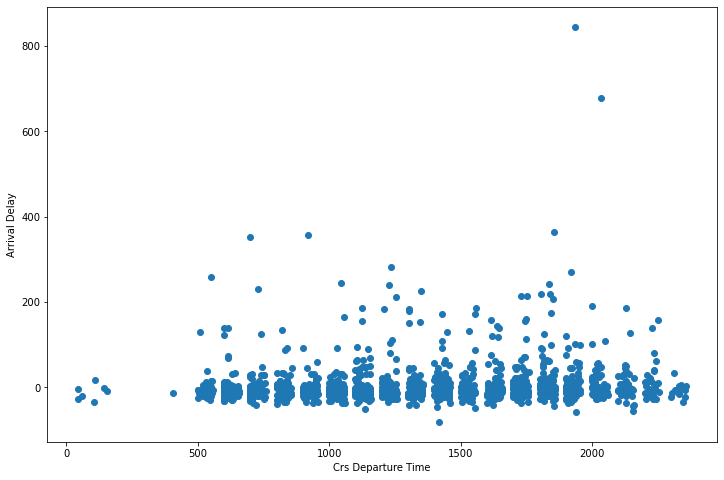

In [24]:
plt.scatter(df['crs_dep_time'] ,   df['arr_delay'] )
plt.xlabel('Crs Departure Time')
plt.ylabel('Arrival Delay')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig('crsdeptimeArrDelay.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

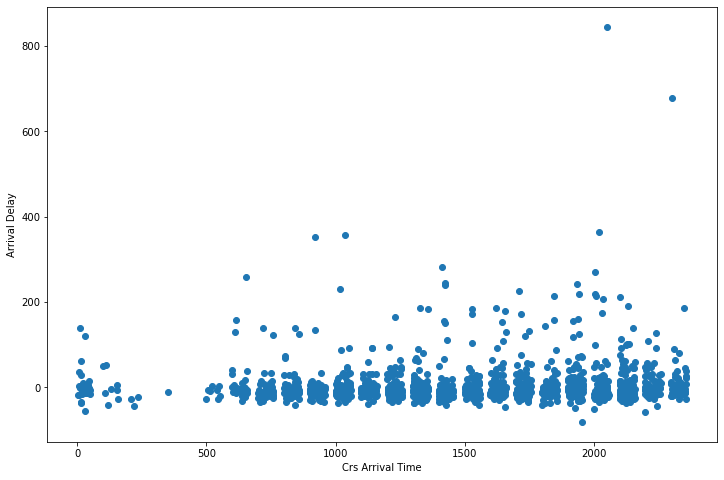

In [25]:
plt.scatter(df['crs_arr_time'] ,   df['arr_delay'] )
plt.xlabel('Crs Arrival Time')
plt.ylabel('Arrival Delay')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig('crsarrtimeArrDelay.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

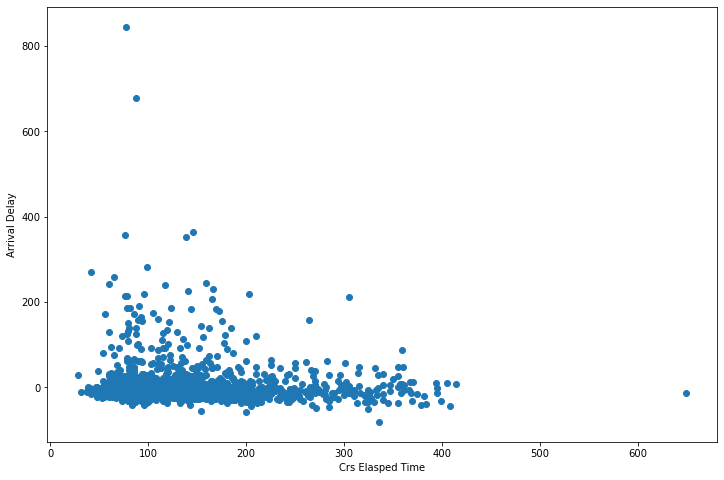

In [26]:
plt.scatter(df['crs_elapsed_time'] ,   df['arr_delay'] )
plt.xlabel('Crs Elasped Time')
plt.ylabel('Arrival Delay')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig('crselapsedtimeArrDelay.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

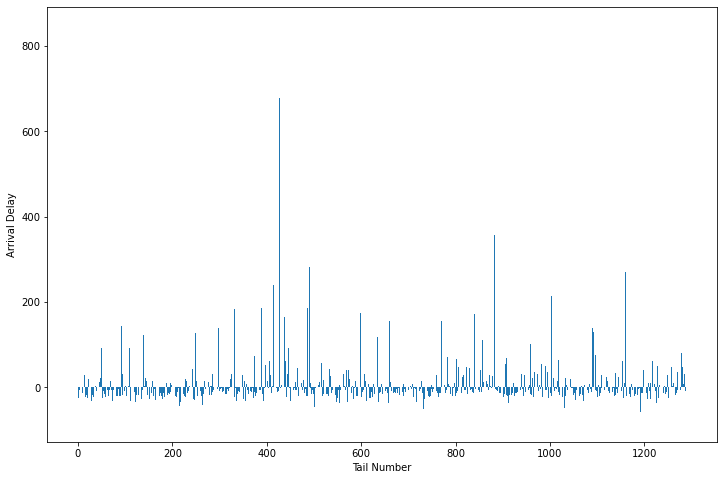

In [27]:
plt.bar(df['tail_num'].astype('category').cat.codes, df['arr_delay'])
plt.xlabel('Tail Number')
plt.ylabel('Arrival Delay')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig('tailnumArrDelay.png')
plt.show

In [ ]:
X['dest_cat'] = X['dest'].cat.codes
X = X.drop(['mkt_carrier','origin','dest','dep_weather'], axis=1)

In [90]:
weather_df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,dep_weather
0,2019-05-15,B6,B6,B6,176,B6,N729JB,176,14843,SJU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunny
1,2018-04-24,UA,UA_CODESHARE,UA,5350,OO,N913SW,5350,10785,BTV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloudy
2,2019-11-13,UA,UA_CODESHARE,UA,4382,EV,N608UX,4382,11193,CVG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunny
3,2018-06-02,AA,AA,AA,1510,AA,N958AN,1510,13930,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunny
4,2018-07-24,AA,AA_CODESHARE,AA,5740,YV,N249LR,5740,11298,DFW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,2019-06-20,WN,WN,WN,865,WN,N944WN,865,14908,SNA,...,8.0,0.0,0.0,0.0,34.0,NaN,NaN,NaN,NaN,Sunny
1477,2019-06-13,DL,DL,DL,1953,DL,N978DL,1953,10397,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunny
1478,2018-03-04,AS,AS,AS,15,AS,N251AK,15,10721,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Snow
1479,2018-09-30,G4,G4,G4,2173,G4,883GA,2173,14259,PSM,...,0.0,0.0,0.0,0.0,21.0,NaN,NaN,NaN,NaN,Sunny


In [6]:
X = weather_df[['mkt_carrier','tail_num','distance','origin','dest','crs_dep_time','crs_elapsed_time','crs_arr_time','dep_weather']]
y = weather_df['arr_delay']

X = X.astype({'mkt_carrier': 'category', 'tail_num': 'category', 'origin': 'category', 'dest': 'category', 'dep_weather': 'category' })

# dummies = pd.get_dummies(X['dep_weather'], drop_first=True)
# X = pd.merge(X,dummies, left_index=True, right_index=True)



X['carrier_cat'] = X['mkt_carrier'].cat.codes
X['tail_cat'] = X['tail_num'].cat.codes
X['origin_cat'] = X['origin'].cat.codes
X['dest_cat'] = X['dest'].cat.codes
X['dep_weather_cat'] = X['dep_weather'].cat.codes


X = X.drop(['mkt_carrier','tail_num','origin','dest','dep_weather'], axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = X['distance'].to_numpy().reshape(-1,1)
scaler.fit(x)
x = scaler.transform(x)
X['distance'] = x

x = X['crs_dep_time'].to_numpy().reshape(-1,1)
scaler.fit(x)
x = scaler.transform(x)
X['crs_dep_time'] = x

x = X['crs_elapsed_time'].to_numpy().reshape(-1,1)
scaler.fit(x)
x = scaler.transform(x)
X['crs_elapsed_time'] = x

x = X['crs_arr_time'].to_numpy().reshape(-1,1)
scaler.fit(x)
x = scaler.transform(x)
X['crs_arr_time'] = x

x = X['carrier_cat'].to_numpy().reshape(-1,1)
scaler.fit(x)
x = scaler.transform(x)
X['carrier_cat'] = x

x = X['tail_cat'].to_numpy().reshape(-1,1)
scaler.fit(x)
x = scaler.transform(x)
X['tail_cat'] = x

x = X['origin_cat'].to_numpy().reshape(-1,1)
scaler.fit(x)
x = scaler.transform(x)
X['origin_cat'] = x

x = X['dest_cat'].to_numpy().reshape(-1,1)
scaler.fit(x)
x = scaler.transform(x)
X['dest_cat'] = x

x = X['dep_weather_cat'].to_numpy().reshape(-1,1)
scaler.fit(x)
x = scaler.transform(x)
X['dep_weather_cat'] = x

X

,distance,crs_dep_time,crs_elapsed_time,crs_arr_time,carrier_cat,tail_cat,origin_cat,dest_cat,dep_weather_cat
0,1.532705,-0.218835,1.366323,0.289197,-0.652805,0.242300,1.551929,-1.482857,0.964382
1,-0.009199,-1.245485,0.306842,-1.088037,0.913716,1.274823,-1.328789,0.680454,-1.317167
2,-0.861260,-0.440869,-0.529590,-0.523754,0.913716,-0.166915,-0.941000,0.680454,0.964382
3,0.415977,-0.257538,0.292902,0.143822,-1.174979,1.564797,0.757885,1.674407,0.964382
4,-0.217519,-0.247353,-0.306541,-0.120148,-1.174979,-1.177758,-0.811737,1.830321,0.964382
...,...,...,...,...,...,...,...,...,...
1476,-0.622205,0.811888,-0.738698,0.815224,1.435890,1.491626,1.625793,1.499004,0.964382
1477,-0.043350,1.610393,-0.139255,1.456020,-0.391719,1.670488,-1.605781,-0.761753,0.964382
1478,2.949960,1.050217,3.764095,1.465584,-0.913892,-1.172338,-1.347255,1.304111,0.203866
1479,0.641372,0.748741,0.683237,1.027547,0.130455,-1.708924,0.997945,1.323600,0.964382


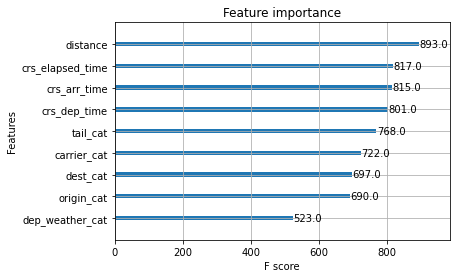

In [8]:
from xgboost import plot_importance
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree=0.2, learning_rate=0.1,
                          subsample=0.8, min_child_weight=5, max_depth=2, gamma=1, alpha=10, n_estimators=110, num_parallel_tree=22)

xg_reg.fit(X,y)

plot_importance(xg_reg)
plt.show()